In [ ]:
!pip intall alphalens-reloaded

In [1]:
import pandas as pd
import alphalens as al

ModuleNotFoundError: No module named 'alphalens'

In [88]:
df_factors = pd.read_parquet('tests/factors.parquet')
df_factors.dropna(inplace=True)
df_factors

open   PV_Corr  dP_P_Corr  \
date                      asset                                   
2018-01-02 08:00:00+08:00 sh.600004  14.73  0.090534   0.270058   
                          sh.600006   5.86  0.413978   0.304839   
                          sh.600017   3.88 -0.018362  -0.004690   
                          sh.600022   2.14 -0.192313  -0.095678   
                          sh.600026   6.11  0.086897   0.036088   
...                                    ...       ...        ...   
2024-05-16 08:00:00+08:00 sz.300287   2.54 -0.190364   0.079971   
                          sz.300291   4.83 -0.348482  -0.214735   
                          sz.300324   2.53 -0.186222   0.029957   
                          sz.300376   5.16 -0.384478   0.275499   
                          sz.300383   8.97 -0.392759   0.304644   

                                     dP_abs_P_Corr  dV_V_Corr  dV_abs_V_Corr  
date                      asset                                               
2018-01-02 08:00:00+08:00 sh.600004      -0.277863   0.097419       0.189974  
                          sh.600006       0.420312   0.253404       0.106000  
                          sh.600017       0.238512  -0.126166      -0.008230  
                          sh.600022      -0.109664   0.034059      -0.054035  
                          sh.600026      -0.122444   0.076649       0.092814  
...                                            ...        ...            ...  
2024-05-16 08:00:00+08:00 sz.300287      -0.182289   0.243220       0.119812  
                          sz.300291      -0.219475  -0.054340       0.085721  
                          sz.300324       0.151901   0.086165      -0.001680  
                          sz.300376       0.087942   0.175358       0.143703  
                          sz.300383       0.103883   0.151362       0.243670  

[742192 rows x 6 columns]

In [89]:
def factor_smooth(factor_series: pd.Series):
    return factor_series.groupby('asset', group_keys=False).apply(lambda x: x.rolling(20).mean())

In [90]:
df_factors.iloc[:, 1:].corr()

PV_Corr  dP_P_Corr  dP_abs_P_Corr  dV_V_Corr  dV_abs_V_Corr
PV_Corr        1.000000   0.020246       0.529976  -0.009892       0.114041
dP_P_Corr      0.020246   1.000000       0.104088   0.043668       0.124446
dP_abs_P_Corr  0.529976   0.104088       1.000000  -0.019042       0.118530
dV_V_Corr     -0.009892   0.043668      -0.019042   1.000000      -0.180044
dV_abs_V_Corr  0.114041   0.124446       0.118530  -0.180044       1.000000

In [91]:
prices = df_factors['open'].unstack(level='asset').shift(-1)
prices

asset                      sh.600004  sh.600006  sh.600017  sh.600022  \
date                                                                    
2018-01-02 08:00:00+08:00      14.84       5.88       3.91       2.17   
2018-01-03 08:00:00+08:00      14.75       5.87       3.95       2.17   
2018-01-04 08:00:00+08:00      14.60       5.85       3.95       2.18   
2018-01-05 08:00:00+08:00      14.68       5.86       3.97       2.18   
2018-01-08 08:00:00+08:00      14.46       5.92       3.98       2.21   
...                              ...        ...        ...        ...   
2024-05-10 08:00:00+08:00      10.25       7.12       2.90       1.29   
2024-05-13 08:00:00+08:00      10.28       7.19       2.97       1.28   
2024-05-14 08:00:00+08:00      10.29       7.35       2.95       1.27   
2024-05-15 08:00:00+08:00      10.23       7.18       2.92       1.26   
2024-05-16 08:00:00+08:00        NaN        NaN        NaN        NaN   

asset                      sh.600026  sh.600037  sh.600039  sh.600053  \
date                                                                    
2018-01-02 08:00:00+08:00       6.20      13.07       4.12      24.01   
2018-01-03 08:00:00+08:00       6.22      13.11       4.14      24.25   
2018-01-04 08:00:00+08:00       6.29      13.08       4.11      24.26   
2018-01-05 08:00:00+08:00       6.30      13.11       4.15      24.10   
2018-01-08 08:00:00+08:00       6.32      13.06       4.20      23.87   
...                              ...        ...        ...        ...   
2024-05-10 08:00:00+08:00      17.07       6.80       7.60      15.34   
2024-05-13 08:00:00+08:00      18.13       6.82       7.67      14.94   
2024-05-14 08:00:00+08:00      17.80       6.90       7.63      15.13   
2024-05-15 08:00:00+08:00      17.88       6.84       7.63      14.69   
2024-05-16 08:00:00+08:00        NaN        NaN        NaN        NaN   

asset                      sh.600056  sh.600058  ...  sz.300257  sz.300266  \
date                                             ...                         
2018-01-02 08:00:00+08:00      24.94      12.09  ...      14.26      26.79   
2018-01-03 08:00:00+08:00      25.23      12.15  ...      14.21      26.45   
2018-01-04 08:00:00+08:00      25.71      12.13  ...      14.24      26.68   
2018-01-05 08:00:00+08:00      25.50      12.12  ...      13.91      26.72   
2018-01-08 08:00:00+08:00      26.14      12.30  ...      14.23      26.89   
...                              ...        ...  ...        ...        ...   
2024-05-10 08:00:00+08:00      11.38       8.07  ...      12.41       1.73   
2024-05-13 08:00:00+08:00      11.30       7.99  ...      12.90       1.69   
2024-05-14 08:00:00+08:00      11.36       8.04  ...      13.02       1.70   
2024-05-15 08:00:00+08:00      11.28       7.99  ...      12.37       1.67   
2024-05-16 08:00:00+08:00        NaN        NaN  ...        NaN        NaN   

asset                      sz.300273  sz.300274  sz.300287  sz.300291  \
date                                                                    
2018-01-02 08:00:00+08:00       9.08      19.50       7.45        NaN   
2018-01-03 08:00:00+08:00       9.42      19.27       7.56        NaN   
2018-01-04 08:00:00+08:00       9.29      18.90       7.46        NaN   
2018-01-05 08:00:00+08:00       9.22      18.01       7.59        NaN   
2018-01-08 08:00:00+08:00       9.39      17.47       7.52        NaN   
...                              ...        ...        ...        ...   
2024-05-10 08:00:00+08:00        NaN     104.90       2.59       4.99   
2024-05-13 08:00:00+08:00        NaN     106.50       2.54       4.89   
2024-05-14 08:00:00+08:00        NaN     108.89       2.55       4.89   
2024-05-15 08:00:00+08:00        NaN     105.16       2.54       4.83   
2024-05-16 08:00:00+08:00        NaN        NaN        NaN        NaN   

asset                      sz.300297  sz.300324  sz.300376  sz.300383  
date                                                           

============= PV_Corr ===========


/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values pri

Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D     5D    20D
Ann. alpha                                      0.131  0.039  0.012
beta                                            0.011 -0.003 -0.000
Mean Period Wise Return Top Quantile (bps)      6.131  1.389 -0.123
Mean Period Wise Return Bottom Quantile (bps)  -7.379 -3.635 -1.616
Mean Period Wise Spread (bps)                  13.510  5.034  1.502

<Figure size 640x480 with 0 Axes>

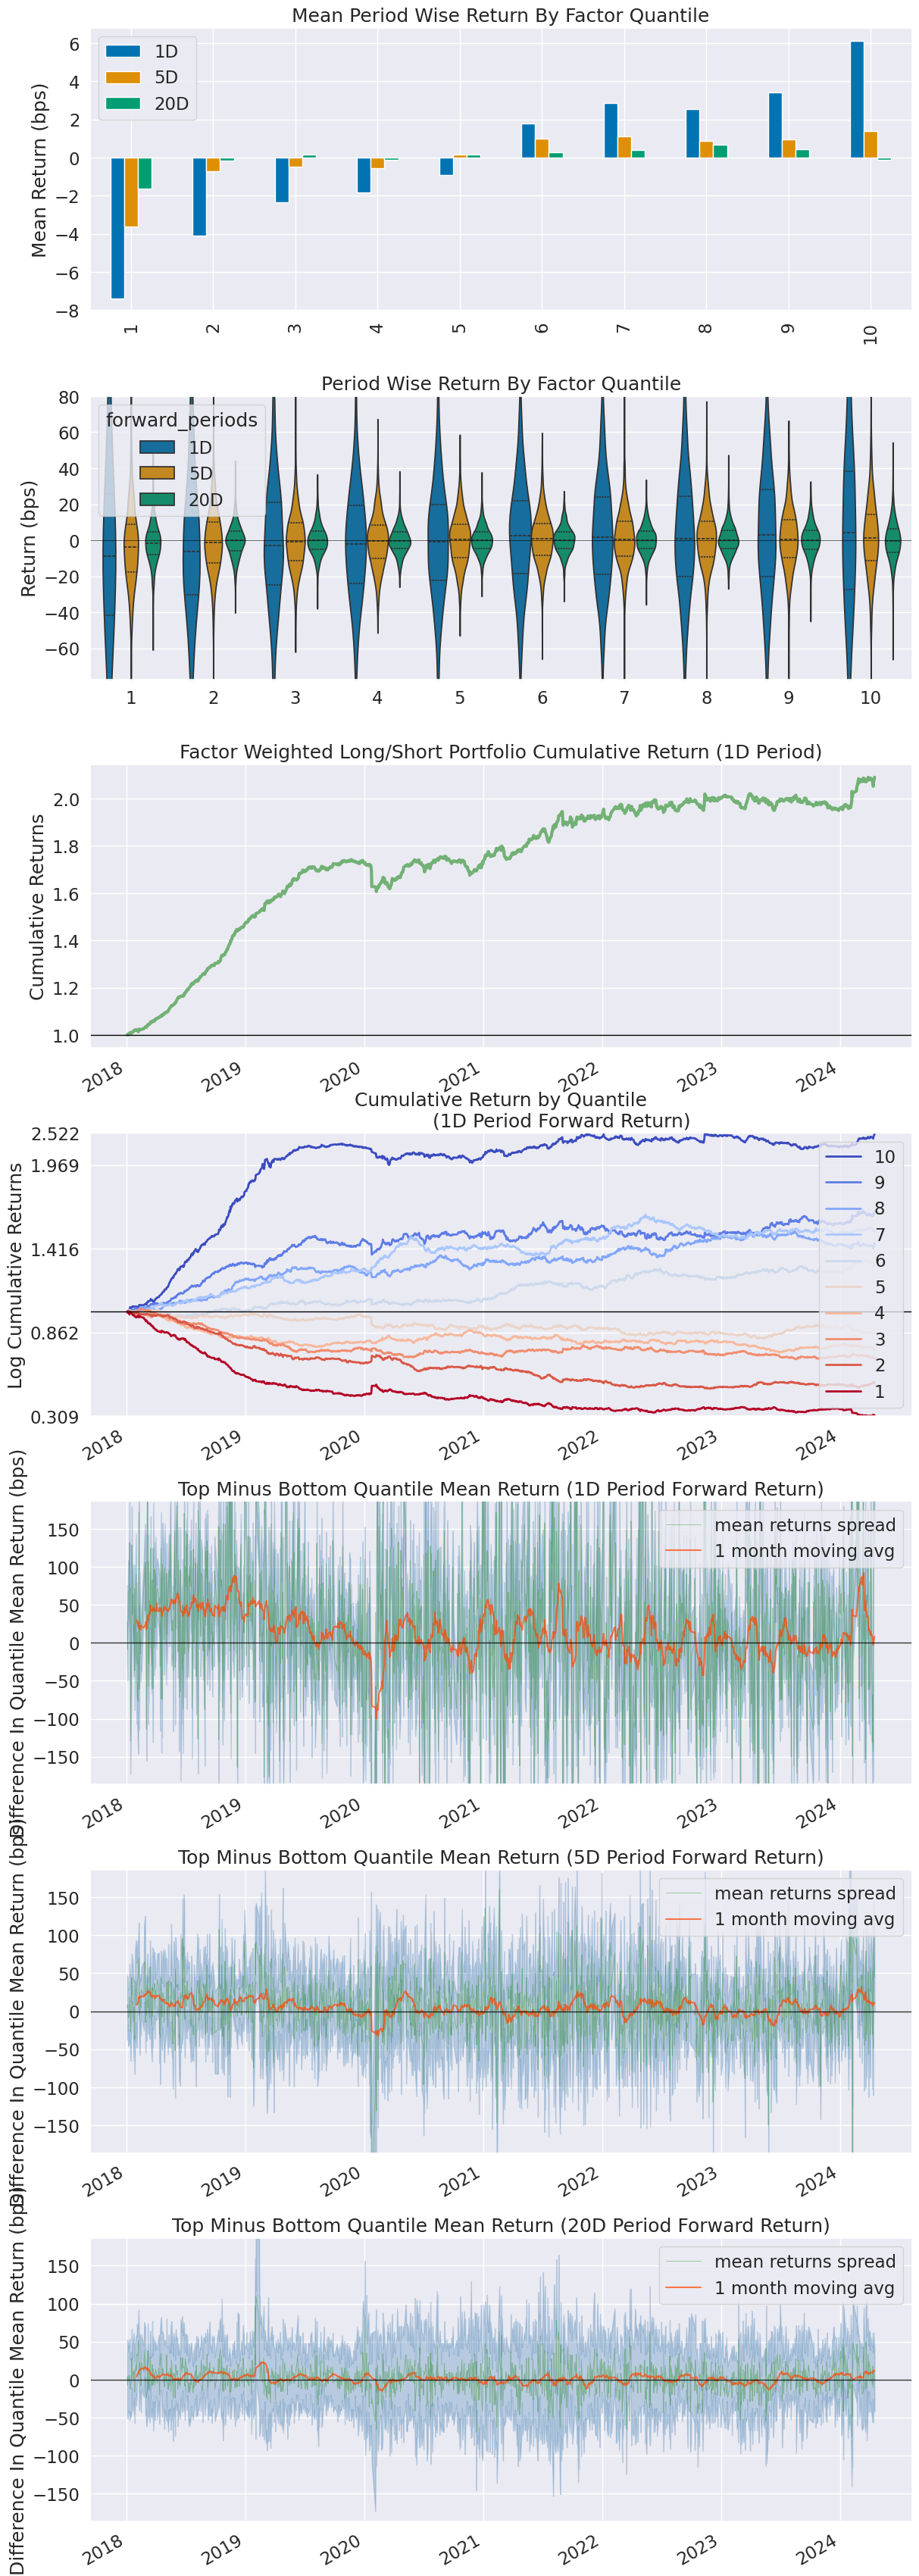

============= dP_P_Corr ===========


/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values pri

Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D     5D    20D
Ann. alpha                                     0.055  0.013  0.011
beta                                          -0.019 -0.005 -0.006
Mean Period Wise Return Top Quantile (bps)     1.412 -0.115  0.484
Mean Period Wise Return Bottom Quantile (bps) -4.430 -1.372 -1.035
Mean Period Wise Spread (bps)                  5.843  1.253  1.515

<Figure size 640x480 with 0 Axes>

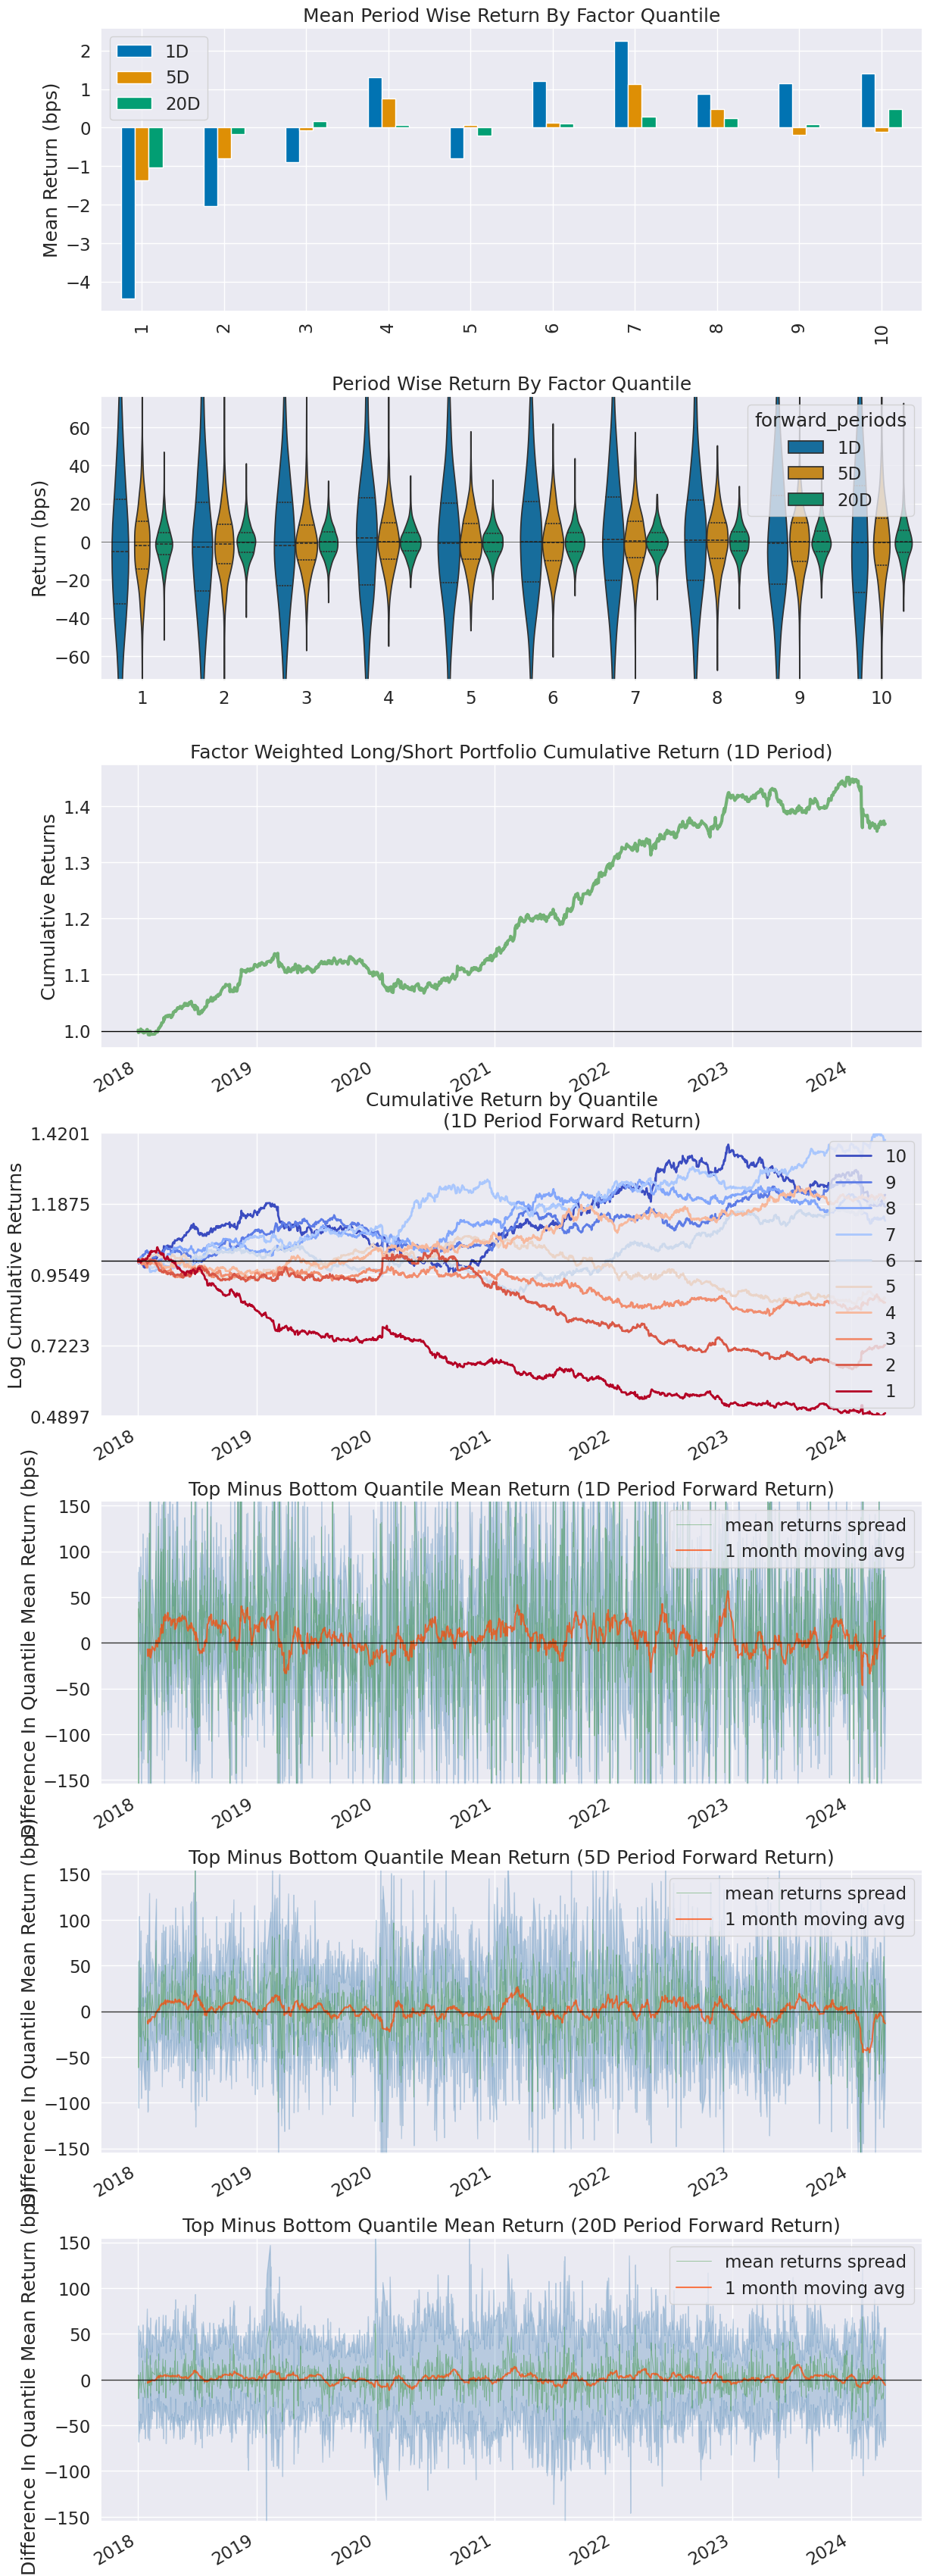

============= dP_abs_P_Corr ===========


/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values pri

Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D     5D    20D
Ann. alpha                                     0.092  0.037  0.015
beta                                           0.002 -0.013 -0.011
Mean Period Wise Return Top Quantile (bps)     4.932  1.730  0.590
Mean Period Wise Return Bottom Quantile (bps) -4.886 -2.331 -1.196
Mean Period Wise Spread (bps)                  9.818  4.057  1.782

<Figure size 640x480 with 0 Axes>

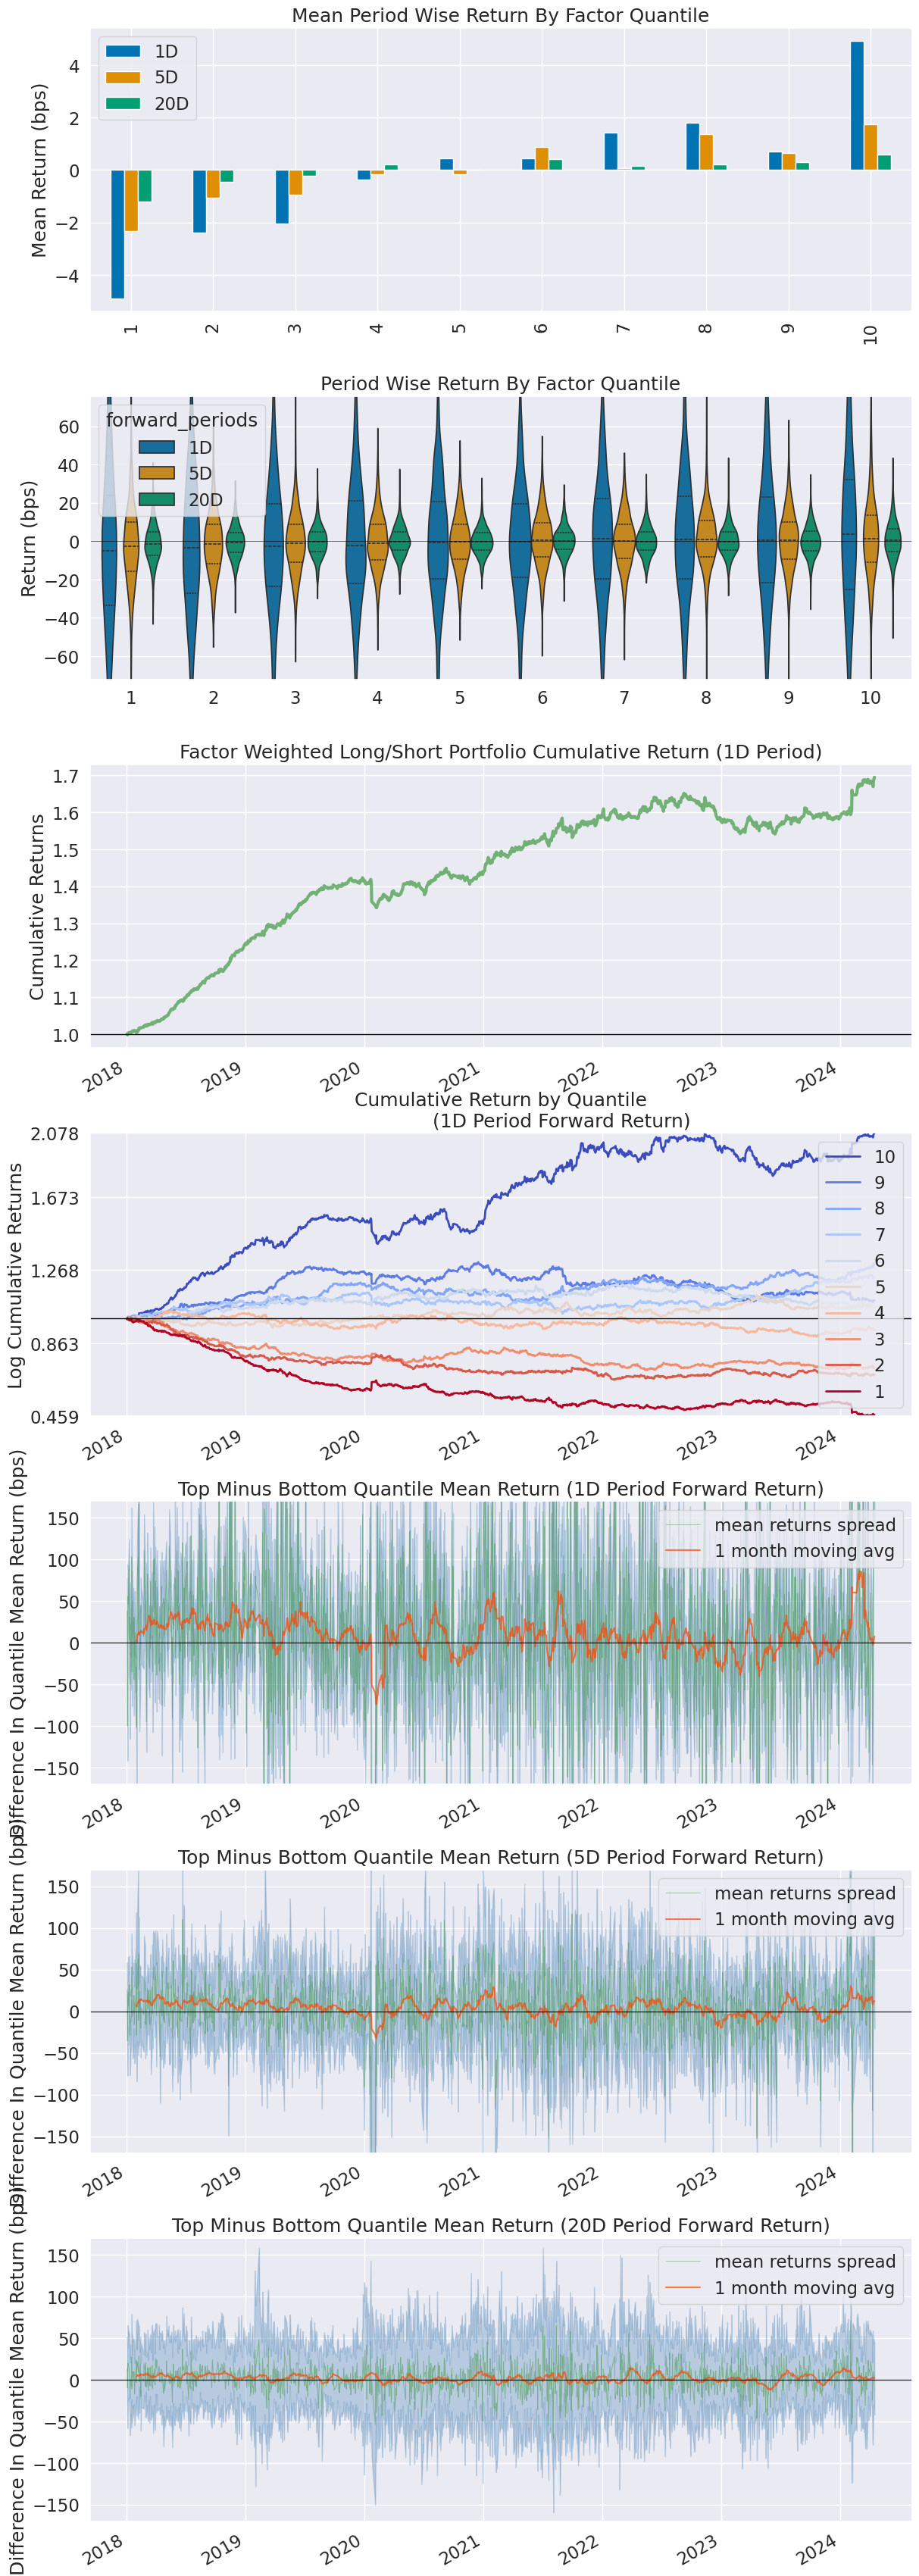

============= dV_V_Corr ===========


/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values pri

Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D     5D    20D
Ann. alpha                                     0.085  0.019  0.009
beta                                           0.015  0.018  0.011
Mean Period Wise Return Top Quantile (bps)     4.423 -0.307 -0.465
Mean Period Wise Return Bottom Quantile (bps) -4.492 -2.211 -1.553
Mean Period Wise Spread (bps)                  8.915  1.859  1.050

<Figure size 640x480 with 0 Axes>

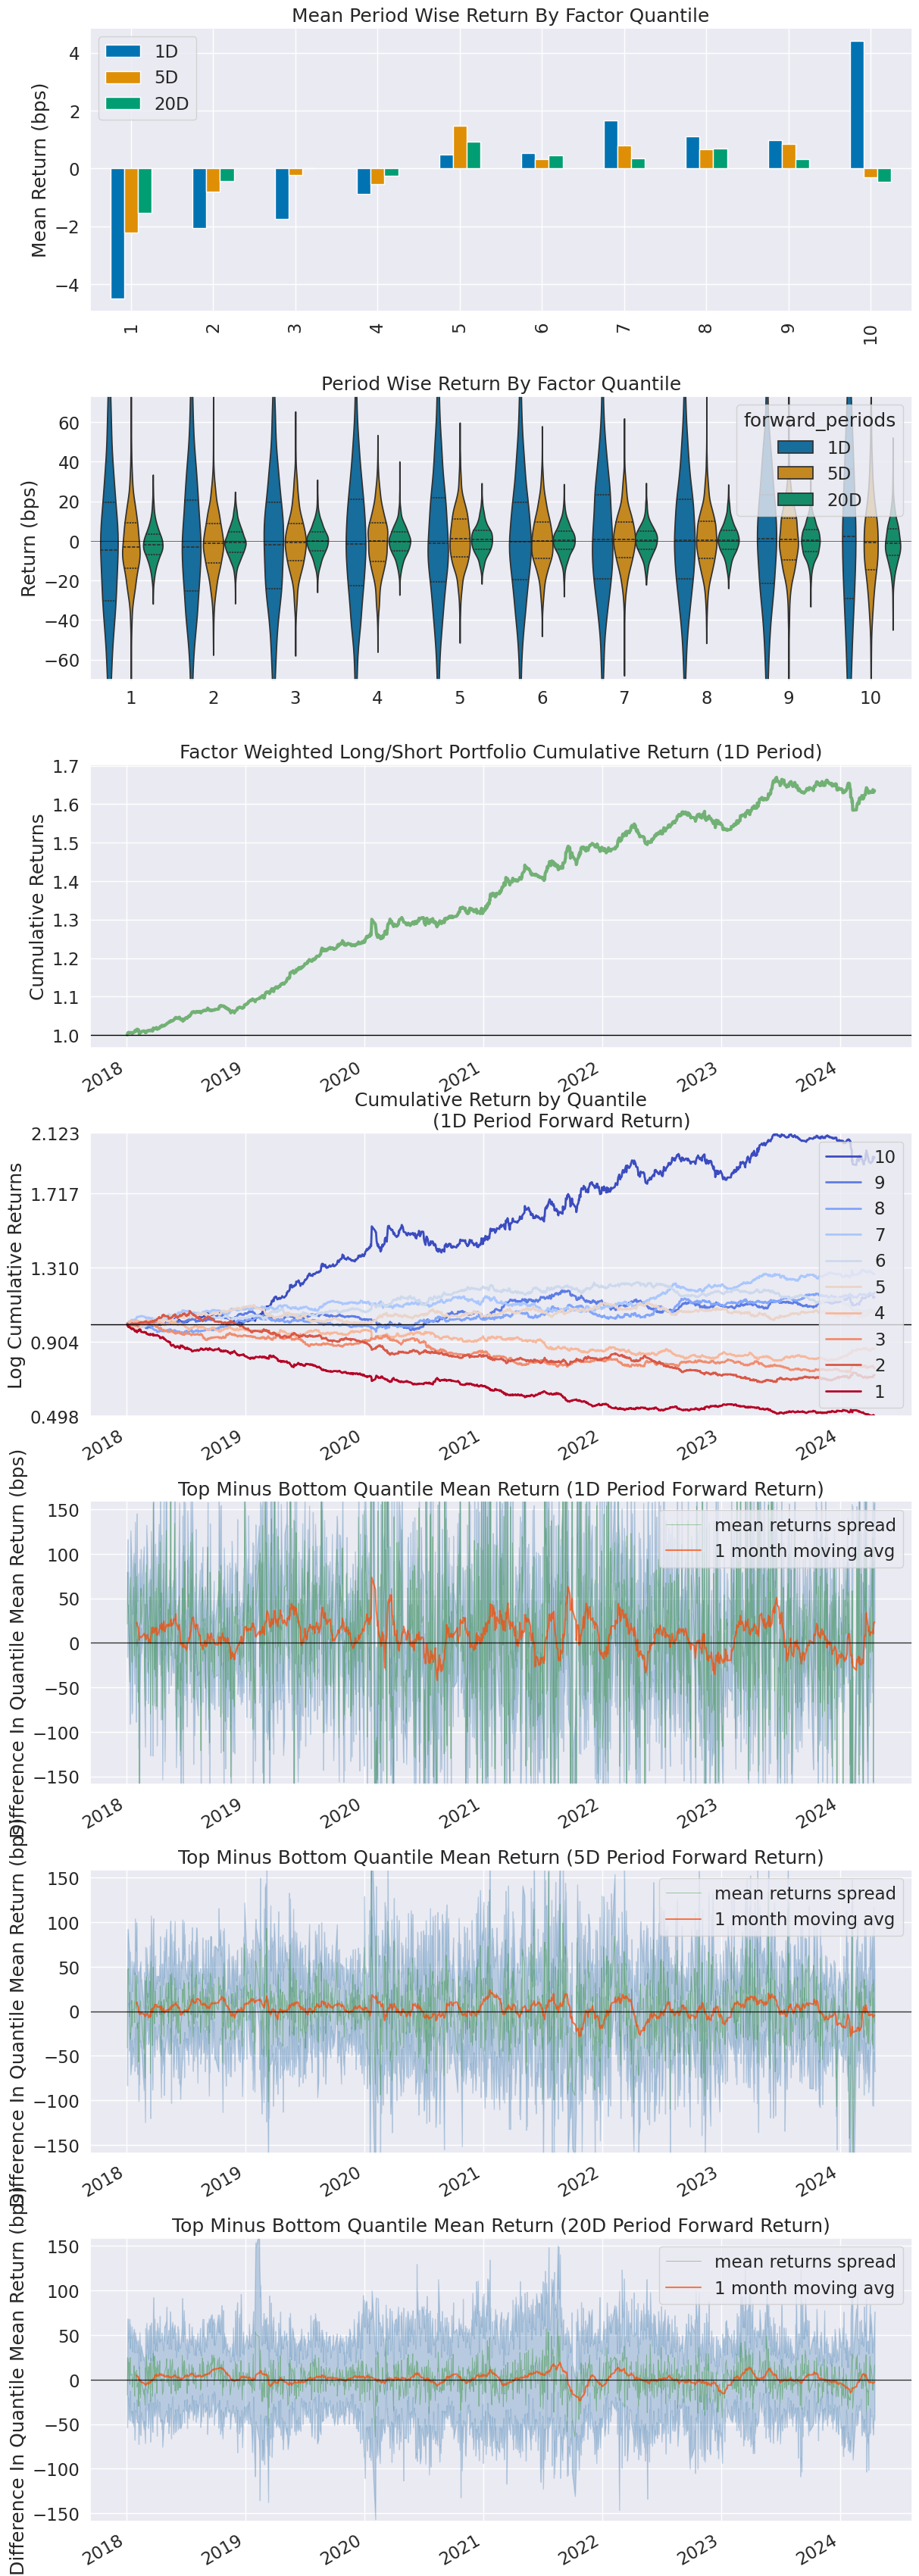

============= dV_abs_V_Corr ===========


/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/root/anaconda3/envs/happyquantenv/lib/python3.10/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values pri

Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D     5D    20D
Ann. alpha                                     0.033  0.051  0.034
beta                                          -0.050 -0.043 -0.047
Mean Period Wise Return Top Quantile (bps)     1.711  1.714  1.277
Mean Period Wise Return Bottom Quantile (bps)  0.431 -2.493 -1.995
Mean Period Wise Spread (bps)                  1.280  4.258  3.315

<Figure size 640x480 with 0 Axes>

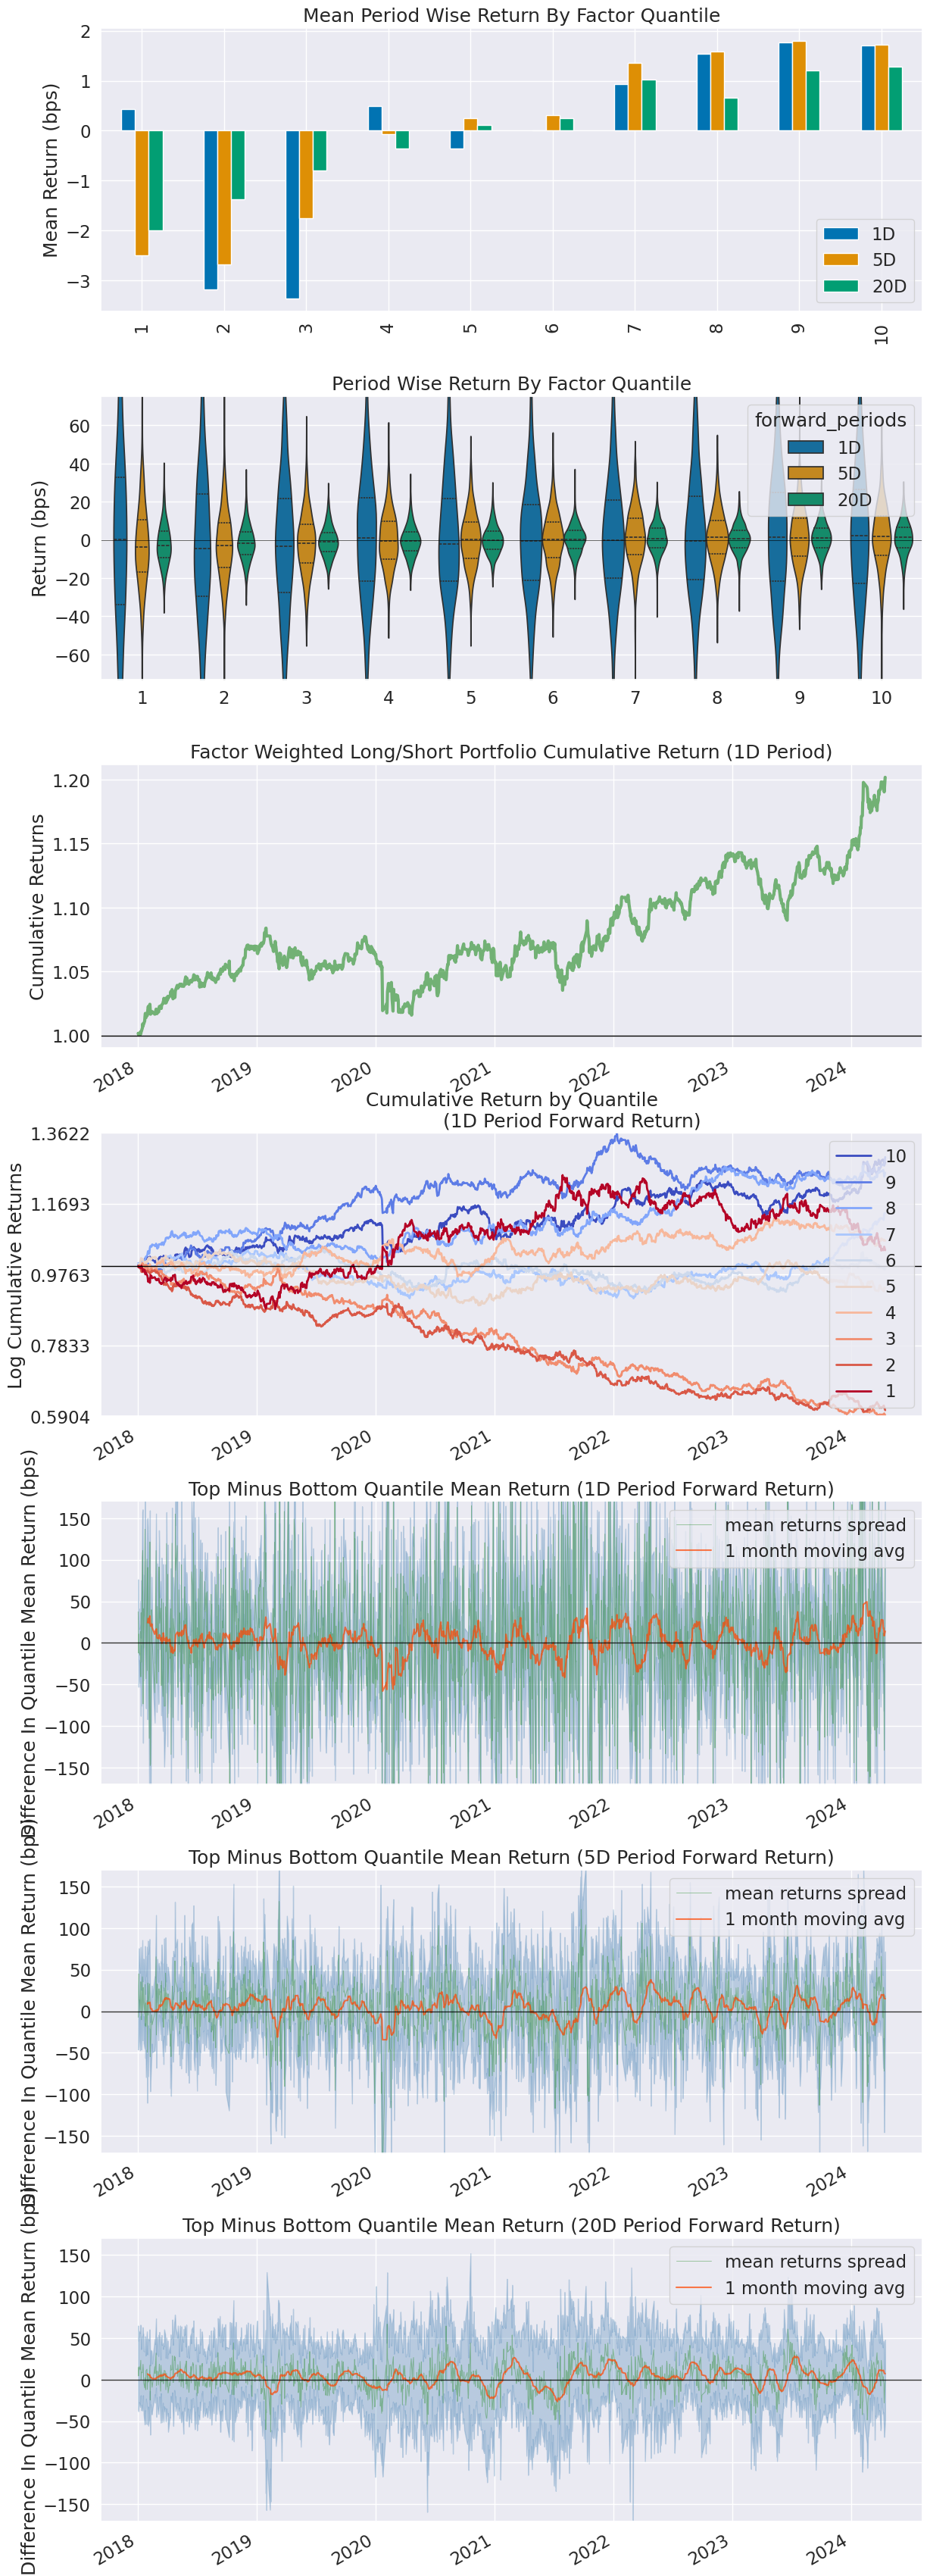

In [96]:
for column in df_factors.columns[1:]:
    print(f"============= {column} ===========")
    factor_data = al.utils.get_clean_factor_and_forward_returns(
        factor=-df_factors[column],
        prices=prices,
        quantiles=10,
        periods=(1, 5, 20),
    )
    al.tears.create_returns_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=False)